# Homework 5

## Name: Rohit Garla NetID:rg3365

# Packages Used

In [317]:
import numpy as np  
import math
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Data

In [318]:
cols_to_use =['idnum','age', 'workerclass', 'interestincome', 
'traveltimetowork', 'vehicleoccupancy', 'meansoftransport', 
'marital', 'schoolenrollment', 'educationalattain', 
'sex', 'workarrivaltime', 'hoursworkperweek', 
'ancestry', 'degreefield', 'industryworkedin', 
'wages']
categoricalcols = ['workerclass','vehicleoccupancy','meansoftransport','marital','educationalattain','sex',
                       'workarrivaltime','degreefield','industryworkedin']
train_data = pd.read_csv("census_train.csv",names = cols_to_use)
test_data = pd.read_csv("census_test.csv",names = cols_to_use)

In [319]:
### Plotting function for Information Gain of each feature
def plot_info(dis_res, title):
#     feat = res.keys()
#     imp = res.values()
#     # Plotting Feature_Names on X-Axis and Feature_importances on Y-Axis
#     plt.figure(figsize=(12, 8))
#     plt.bar(range(len(feat)), imp)
#     plt.xticks(range(len(feat)), feat, rotation=40)
#     plt.xlabel('Feature Name')
#     plt.ylabel('Feature Importance')
#     plt.title(title)
#     plt.show()
    lists = sorted(dis_res.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.figure(figsize=(12, 8))
    plt.bar(x, y)
    plt.xticks(x, rotation=75)
    plt.title(title)
    plt.show()

In [320]:
def scaling(X,y):
    from sklearn.preprocessing import RobustScaler
    cols =['age', 'workerclass', 'interestincome', 'traveltimetowork',
           'vehicleoccupancy', 'meansoftransport',
           'marital', 'schoolenrollment', 'educationalattain', 
           'sex', 'workarrivaltime', 'hoursworkperweek', 
           'ancestry', 'degreefield', 'industryworkedin']
    scaler = RobustScaler()
    scaler_x = scaler.fit(X)
    scaler_y = scaler.fit(y.reshape(-1, 1))

    scaled_train = scaler_x.transform(X)
    scaled_y = scaler_y.transform(y.reshape(-1, 1))

    scaled_train = pd.DataFrame(scaled_train, columns=cols)
    scaled_y = pd.DataFrame(y, columns = ["wages"])
    return scaled_train

# Mutal Information of Features

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversi

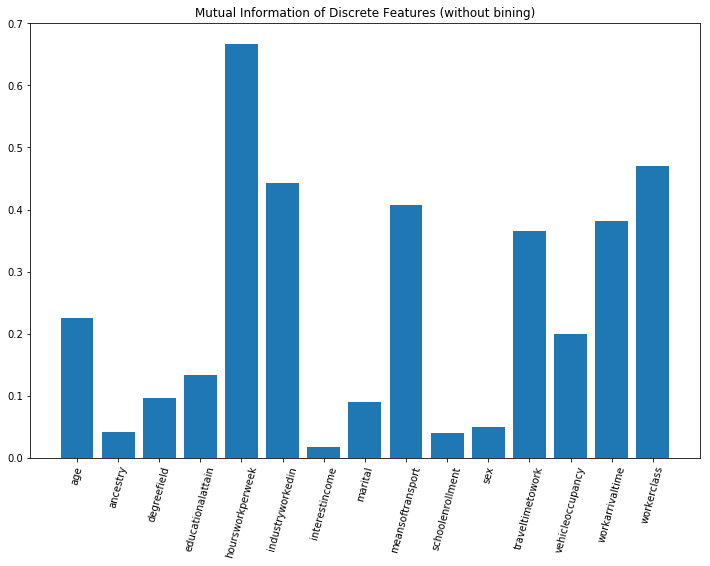

In [321]:
from sklearn.feature_selection import mutual_info_regression

discrete_feat = ['age', 'workerclass', 'interestincome', 
'traveltimetowork', 'vehicleoccupancy', 'meansoftransport', 
'marital', 'schoolenrollment', 'educationalattain', 
'sex', 'workarrivaltime', 'hoursworkperweek', 
'ancestry', 'degreefield', 'industryworkedin']
dis_mutual_info = mutual_info_regression(scaling(nullvaluedealingwithoutbinning(train_data[discrete_feat]),train_data.wages), train_data.wages, copy = True)

dis_res = dict(zip(discrete_feat, dis_mutual_info))
#print(dis_res)
plot_info(dis_res, "Mutual Information of Discrete Features (without bining)")

# Dropping columns

In [322]:
#droping idnum
train_data = train_data.drop('idnum',axis=1)
test_data = test_data.drop('idnum',axis =1)
#droping interest income
train_data = train_data.drop('interestincome',axis =1)
test_data = test_data.drop('interestincome',axis =1)
#droping school enrollment
train_data = train_data.drop('schoolenrollment',axis =1)
test_data = test_data.drop('schoolenrollment',axis =1)
#droping ancestry
train_data = train_data.drop('ancestry',axis =1)
test_data = test_data.drop('ancestry',axis =1)
#drop travel time to work
#train_data = train_data.drop('traveltimetowork',axis =1)
#test_data = test_data.drop('traveltimetowork',axis =1)

#drop sex
train_data = train_data.drop('sex',axis =1)
test_data = test_data.drop('sex',axis =1)
#drop 

test_data['wages'] = 0
droppedcols = ['idnum','interestincome','schoolenrollment','ancestry','sex']

# Preprocessing Data

In [323]:
#converting to string all the columns for easier manipulation
for x in cols_to_use:
    if x!='idnum' and x not in droppedcols:
        #print (x)
        train_data[x] = train_data[x].astype(str)
        test_data[x] = test_data[x].astype(str)
    if ((x not in categoricalcols) and (x not in droppedcols)):
        print(x)
        train_data[x] = train_data[x].replace('?','-1')
        test_data[x] = test_data[x].replace('?','-1')
        train_data[x] = train_data[x].astype(int)
        test_data[x] = test_data[x].astype(int)

 #train_data.loc[(train_data.workarrivaltime == '?') & (train_data.meansoftransport == '11'),'workarrivaltime'] = '0'
# train_data.workarrivaltime.value_counts()

age
traveltimetowork
hoursworkperweek
wages


# One hot encoding

In [324]:
def onehotencoding(data,test_data,flag):
    categoricalcols = ['workerclass','vehicleoccupancy','meansoftransport','marital','educationalattain',
                       'workarrivaltime','degreefield','industryworkedin']
    for x in categoricalcols:
        values = list(data[x].unique())
        for y in values:
            data[y] = '0'
            test_data[y] = '0'
            data.loc[(data[x] == y), y] = '1'
            test_data.loc[(test_data[x] == y), y] = '1'
            
        data = data.drop(x,axis =1)
        test_data = test_data.drop(x, axis =1)
    #data = topkinfogain(data)
    print (data.shape)
    print(test_data.shape)
    if (flag=='train'):
        return data
    elif(flag=='test'):
        return test_data

# Null Value Dealing

In [325]:
def nullvaluedealing(data):
    #worker class
    data.loc[(data.age <= 16) & (data.workerclass =='?') , 'workerclass'] = '10'#people age less than 16
    data.loc[(data.industryworkedin =='?') & (data.workerclass =='?'),'workerclass'] = '11' #people who never worked and not in labour force and last worked more than 5 years ago
    
    #train_data.loc[(train_data.vehicleoccupancy == '?')&(train_data.traveltimetowork == '0nw'),'vehicleoccupancy'] = 0
    data.loc[(data.workarrivaltime == '?') & (data.meansoftransport == '11'),'workarrivaltime'] = '0'
    data.loc[(data.workarrivaltime == '?'),'workarrivaltime'] = '-1'
    
    data.loc[(data.industryworkedin == '?') & (data.age <= 16),'industryworkedin'] = '0'
    data.loc[(data.industryworkedin == '?') & (data.age <= 16),'industryworkedin'] = '9920'
    
    data = data.replace('?', '0')
    data = workarrivaltimebins(data)
    data = industryworked(data)
    return data

In [326]:
def nullvaluedealingwithoutbinning(data):
    #worker class
    data.loc[(data.age <= 16) & (data.workerclass =='?') , 'workerclass'] = '10'#people age less than 16
    data.loc[(data.industryworkedin =='?') & (data.workerclass =='?'),'workerclass'] = '11' #people who never worked and not in labour force and last worked more than 5 years ago
    
    #train_data.loc[(train_data.vehicleoccupancy == '?')&(train_data.traveltimetowork == '0nw'),'vehicleoccupancy'] = 0
    data.loc[(data.workarrivaltime == '?') & (data.meansoftransport == '11'),'workarrivaltime'] = '0'
    data.loc[(data.workarrivaltime == '?'),'workarrivaltime'] = '-1'
    
    data.loc[(data.industryworkedin == '?') & (data.age <= 16),'industryworkedin'] = '0'
    data.loc[(data.industryworkedin == '?') & (data.age <= 16),'industryworkedin'] = '9920'
    
    data = data.replace('?', '0')
    #data = workarrivaltimebins(data)
    #data = industryworked(data)
    return data

# work arrival time binning

In [327]:
def workarrivaltimebins(data):
    count=1
    final=0
    for x in range(len(data.workarrivaltime)):
        if(x%20 == 0):
            data['workarrivaltime'][x-20:x+1] = final
    #         c=c+1
    #         f=f+1
            final += 1
    data['workarrivaltime'].unique()
    return data

# industry worked in

In [328]:
def industryworked(data):
    data['industryworkedin'] = data['industryworkedin'].astype(int)
    data.loc[data.industryworkedin < 300, 'industryworkedin'] = 1
    data.loc[data.industryworkedin < 500, 'industryworkedin'] = 2
    data.loc[data.industryworkedin < 700, 'industryworkedin'] = 3
    data.loc[data.industryworkedin < 800, 'industryworkedin'] = 4
    data.loc[data.industryworkedin < 4000, 'industryworkedin'] = 5
    data.loc[data.industryworkedin < 4600, 'industryworkedin'] = 6
    data.loc[data.industryworkedin < 6000, 'industryworkedin'] = 7
    data.loc[data.industryworkedin < 6400, 'industryworkedin'] = 8
    data.loc[data.industryworkedin < 6800, 'industryworkedin'] = 9
    data.loc[data.industryworkedin < 7200, 'industryworkedin'] = 10
    data.loc[data.industryworkedin < 7800, 'industryworkedin'] = 1
    data.loc[data.industryworkedin < 7900, 'industryworkedin'] = 12
    data.loc[data.industryworkedin < 8300, 'industryworkedin'] = 13
    data.loc[data.industryworkedin < 8500, 'industryworkedin'] = 14
    data.loc[data.industryworkedin < 8700, 'industryworkedin'] = 15
    data.loc[data.industryworkedin < 9300, 'industryworkedin'] = 16
    data.loc[data.industryworkedin < 9600, 'industryworkedin'] = 17
    data.loc[data.industryworkedin < 9900, 'industryworkedin'] = 18
    data.loc[data.industryworkedin > 9900, 'industryworkedin'] = 19
    data['industryworkedin'] = data['industryworkedin'].astype(int)
    
    return data

# Linear Regression

In [255]:
def linearRegressionmodel(data):
    
    y = data.wages
    x = data.drop('wages',axis =1)
    x_train, x_test, y_train, y_test = np.array(train_test_split(x, y, train_size = 0.7))

    LR_model = LinearRegression()
    LR_model.fit(x_train, y_train)
    preds = LR_model.predict(x_test)

    scores = cross_val_score(LR_model, x, y, cv=10,scoring="neg_mean_squared_error")
    #print(preds)
    
    scores = math.sqrt(min(abs(scores)))
    return scores

In [256]:
data = onehotencoding(nullvaluedealing(train_data),test_data,'train')
linearRegressionmodel(data) #no changes 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


145387495335.66458

# Neural Network

In [257]:
def NeuralNetmodel(data):
    y = data.wages
    x = data.drop('wages',axis =1)
    x_train, x_test, y_train, y_test = np.array(train_test_split(x, y, train_size = 0.7,random_state = 4))
    
    model  =  mlp(hidden_layer_sizes=100,activation = 'relu')
    model1 = mlp(hidden_layer_sizes=100,activation = 'logistic')
    model.fit(x_train,y_train)
    model1.fit(x_train,y_train)
    
    preds1 = model1.predict(x_test)
    preds = model.predict(x_test)
    #model.score()
    
    #print(preds)
    #print(preds1)
    
    scores = cross_val_score(model, x, y, cv=10,scoring="neg_mean_squared_error")
    scores1 = cross_val_score(model1, x, y, cv=10,scoring="neg_mean_squared_error")
    
    scores = math.sqrt(min(abs(scores)))
    scores1 = math.sqrt(min(abs(scores1)))
    
    return scores,scores1
    

In [258]:
data = onehotencoding(nullvaluedealing(train_data),test_data,'train')
NeuralNetmodel(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neura

(38199.845839599184, 47365.18991106058)

# Random Forest Model Regressor

## Default Random Forest

In [261]:
def Randomforestmodel1default(data):
    y = data.wages
    x = data.drop('wages',axis =1)
    d={}
    x_train, x_test, y_train, y_test = np.array(train_test_split(x, y, train_size = 0.7))
#         random_forest = rf(bootstrap = True, max_depth = 30, max_features = 'sqrt', \
#                                                     min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1400)
    random_forest=rf()
            # Fit the Model
    random_forest.fit(x_train, y_train)

            # Get the Scores
    train_score = random_forest.score(x_train, y_train)
            #cv_score = cross_val_score(random_forest, x_train, y_train, cv=5, scoring = scorer)
    preds = random_forest.predict(x_test)
    rmse_score = math.sqrt(mse(y_test, preds))

    scores = cross_val_score(random_forest, x, y, cv=10,scoring="neg_mean_squared_error")
    #print(preds)
    
    scores = math.sqrt(min(abs(scores)))
    return scores

In [262]:
data = onehotencoding(nullvaluedealing(train_data),test_data,'train')
dicts = Randomforestmodel1default(data)
dicts

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


25964.47067368035

# Hyper Parameter Tuning

In [263]:
def rf_tuning(data):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = rf()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    y = data.wages
    x = data.drop('wages',axis =1)
    x_train, x_test, y_train, y_test = np.array(train_test_split(x, y, train_size = 0.7))
    rf_random.fit(x_train, y_train)
    return rf_random.best_params_

In [264]:
data = onehotencoding(nullvaluedealing(train_data),test_data,'train')
rf_best_params = rf_tuning(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, 

[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   12.7s remaining:    1.1s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=   6.8s
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=   7.4s


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.6s finished


In [265]:
rf_best_params

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [339]:
def Randomforestmodel1afterparametertuning(dat):
    y = data.wages
    x = data.drop('wages',axis =1)
    
   
    x_train, x_test, y_train, y_test = np.array(train_test_split(x, y, train_size = 0.7,random_state = 71))
    random_forest = rf(bootstrap = True, max_depth = 30, max_features = 'sqrt', \
                                                     min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1400)

            # Fit the Model
    random_forest.fit(x_train, y_train)

            # Get the Scores
       # train_score = random_forest.score(x_train, y_train)
            #cv_score = cross_val_score(random_forest, x_train, y_train, cv=5, scoring = scorer)
    preds = random_forest.predict(x_test)
    rmse_score = math.sqrt(mse(y_test, preds))

    scores = cross_val_score(random_forest, x, y, cv=10,scoring="neg_mean_squared_error")
    print(abs(scores))
    print((math.sqrt(min(abs(scores)))))
    return random_forest

In [340]:
data = onehotencoding(nullvaluedealing(train_data),test_data,'train')
final_model = Randomforestmodel1afterparametertuning(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[1.28281098e+09 2.26557566e+09 7.03266670e+08 1.13683069e+10
 4.91655714e+09 1.01702350e+09 3.12639798e+09 4.14196233e+08
 7.98463083e+09 1.04403915e+09]
20351.811540350336


# Random Forest Classfier

In [274]:
def RandomForestClassfiertuning(train_data):   
    train_data_classifier  = onehotencoding(nullvaluedealing(train_data),test_data,'train')
    train_data_classifier.loc[train_data_classifier['wages'] > 0,'wages'] = 1
    data = train_data_classifier
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
        # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
        # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
        # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
        # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
        # Method of selecting samples for training each tree
    bootstrap = [True, False]
        # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap}

        # Use the random grid to search for best hyperparameters
        # First create the base model to tune
    random_forest = rfc()
        # Random search of parameters, using 3 fold cross validation, 
        # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=71, n_jobs = -1)
        # Fit the random search model
    y = data.wages
    x = data.drop('wages',axis =1)
    x_train, x_test, y_train, y_test = np.array(train_test_split(x, y, train_size = 0.7))
    rf_random.fit(x_train, y_train)
    return rf_random.best_params_

In [275]:
RandomForestClassfiertuning(train_data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_featu

[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    8.5s remaining:    0.7s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=   2.0s
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=   2.0s


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.8s finished


{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 800}

In [276]:
def RandomForestClassfier(data):
        # Classification Model
    data.loc[data['wages'] > 0,'wages'] = 1
    y = data.wages
    x = data.drop('wages',axis =1)
    x_train, x_test, y_train, y_test = np.array(train_test_split(x, y, train_size = 0.7,random_state = 71))
    random_forest_classifier = rfc(n_estimators = 800, min_samples_split = 10, min_samples_leaf = 2, 
                                   max_features = 'auto', max_depth = 110, bootstrap = False)
    
    # Fit the model
    random_forest_classifier.fit(x_train, y_train)

    # Predictions
    classifier_predictions = random_forest_classifier.predict(x_test)
    rmse_score = math.sqrt(mse(y_test, classifier_predictions))
    print(rmse_score)
    return random_forest_classifier

In [277]:
data = onehotencoding(nullvaluedealing(train_data),test_data,'train')
classifier_final_model = RandomForestClassfier(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.1757807623276631


In [271]:
data =onehotencoding(nullvaluedealing(train_data),test_data,'test')
final_model.predict(data.drop('wages',axis=1))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


array([  4405.53620463,  57195.07264116, 108019.48649736,   3280.77059093,
        69530.00731747,  61108.80789873,   3230.98827739,  54509.48655842,
         5391.47359312,   5391.47359312,  41629.90835242,   1776.19227561,
        29750.81087937,  30404.87358628,  61435.79785991,  90743.69319966,
        28491.9956759 ,   2913.80104393,   4730.37993097, 102500.09806636,
        31368.42925611,   1302.59422441,  63782.87313056,   6027.54275265,
         2438.20993807,  28441.52538246,  70519.52734227,  64666.90621203,
         2858.47134261, 132283.96107203,   4822.38703593,  77506.62474844,
         1011.96020911,  40881.35757418, 144685.78858527,   2621.36348573,
         3727.27697551,  44431.95982811,  18363.96579715, 117857.91417838,
         6158.73374117,   1636.76565298,  69886.81843226,  28493.5803961 ,
        38230.99395085,   1218.43831272, 171004.37709387,  60905.14506192,
         3830.72672172,   1206.68811223,  52751.34782715,  82242.90671646,
        46243.23851655,  

In [279]:
data =onehotencoding(nullvaluedealing(train_data),test_data,'test')
classifier_final_model.predict(data.drop('wages',axis=1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [295]:
data =onehotencoding(nullvaluedealing(train_data),test_data,'test')
test_data_index = pd.read_csv("census_test.csv",names = cols_to_use)
test_data_index.idnum
Final_prediction = pd.DataFrame()
Final_prediction['Id'] = test_data_index.idnum
reg_preds=np.round(final_model.predict(data.drop('wages',axis=1))/100)*100
Final_prediction['Regression'] = reg_preds

Final_prediction['Classification'] = classifier_final_model.predict(data.drop('wages',axis=1))
Final_prediction['Wages'] = Final_prediction['Regression']
Final_prediction.loc[Final_prediction['Classification'] == 0,'Wages']=0
Final_prediction.index=test_data_index.idnum

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1184, 184)
(500, 184)


In [297]:
Final_prediction.head()

,Id,Regression,Classification,Wages
idnum,,,,
1405,1405,4400.0,0,0.0
1406,1406,57200.0,1,57200.0
1407,1407,108000.0,1,108000.0
1408,1408,3300.0,0,0.0
1410,1410,69500.0,1,69500.0


In [309]:
Submission = pd.DataFrame()
Submission['Id'] =  Final_prediction['Id']
Submission['Wages'] = Final_prediction['Wages']
Submission.index = Submission['Id']
Submission = Submission.drop('Id',axis=1)

In [312]:
Submission.to_csv("test_outputs_.csv")

In [311]:
Submission.head()

,Wages
Id,
1405,0.0
1406,57200.0
1407,108000.0
1408,0.0
1410,69500.0
